In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from langdetect import detect
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sys
sys.path.append('../')
from scripts.extraction.extract_data import load_xml_files
from scripts.utils.functions import sturges_rule, remove_html_tags, remove_last_paragraph

In [2]:
data, _, not_XML_valid, without_summary = load_xml_files('2020', loggs_enabled = True)

13159 files imported successfully.
There was an error importing 145 files:

3 damaged files: ~$000862.xml, ~$031404.xml, ~$000827.xml
141 files without summary: 2035012.xml, 2048588.xml, 2041976.xml, ...


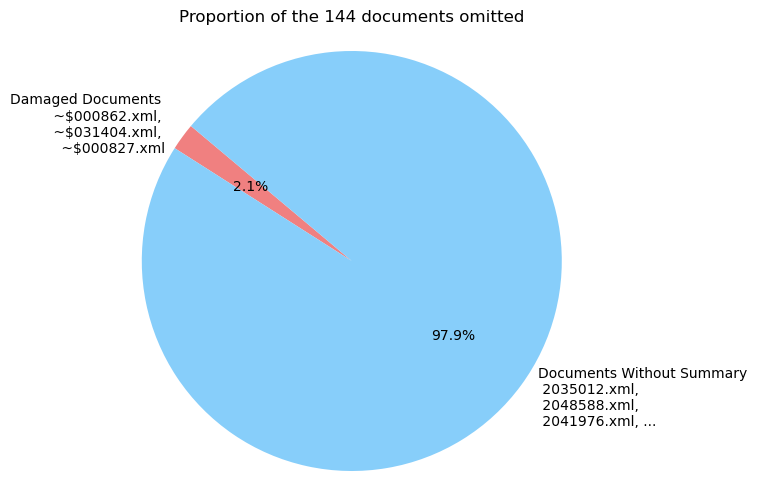

In [3]:
labels = [f'Damaged Documents \n {not_XML_valid[0]}, \n {not_XML_valid[1]}, \n {not_XML_valid[2]}', 
          f'Documents Without Summary \n {without_summary[0]},\n {without_summary[1]},\n {without_summary[2]}, ...']
sizes = [len(not_XML_valid), len(without_summary)]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Proportion of the {sum(sizes)} documents omitted')
plt.axis('equal')
plt.show()









In [4]:
df = pd.DataFrame({'words': [len(element) for element in data]})
df.index.name = 'index'

kurtosis_values = df[['words']].kurtosis()
asimetria_values = df[['words']].skew()


description = df.describe().transpose()
description['kurtosis'] = kurtosis_values
description['skewness'] = asimetria_values
description['median'] = description['50%']
description['Q1 (25%)'] = description['25%']
description['Q2 (50%)'] = description['50%']
description['Q3 (75%)'] = description['75%']

description = description.round(2)
description[['mean', 'median', 'min', 'max', 'std', 'Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)', 'skewness', 'kurtosis']]


,mean,median,min,max,std,Q1 (25%),Q2 (50%),Q3 (75%),skewness,kurtosis
words,2943.36,2908.0,201.0,7735.0,818.96,2392.0,2908.0,3430.0,0.52,1.26


In [5]:

""" To determinate how many languages are in the set """
lenguages = {}
mapper = {'en': 'English', 'es': 'Spanish', 'fr': 'French'}

for file in data:
    lenguage = detect(file)
    if mapper[lenguage] in lenguages.keys():
        lenguages[mapper[lenguage]] += 1
    else:
        lenguages[mapper[lenguage]] = 1
        
labels, sizes = zip(*lenguages.items())


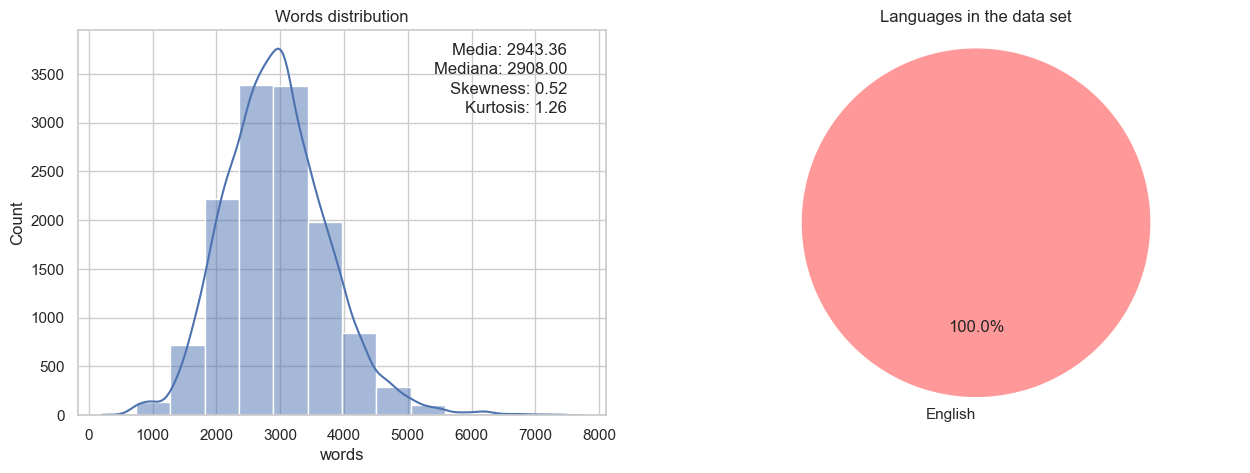

In [6]:
mean_value = df['words'].mean()
median_value = df['words'].median()
skewness_value = description['skewness']['words']
kurtosis_value = description['kurtosis']['words']

sns.set(style='whitegrid')
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['words'], bins = sturges_rule(df['words']), kde = True, ax=axs[0])
axs[0].text(7500, 3700, f'Media: {mean_value:.2f}', ha='right')
axs[0].text(7500, 3500, f'Mediana: {median_value:.2f}', ha='right')
axs[0].text(7500, 3300, f'Skewness: {skewness_value:.2f}', ha='right')
axs[0].text(7500, 3100, f'Kurtosis: {kurtosis_value:.2f}', ha='right')
axs[0].set_title('Words distribution')

colors = ['#ff9999','#66b3ff','#99ff99']
axs[1].pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title('Languages in the data set')


plt.show()

/Users/luis.caporal/Documents/Notebooks/DS_TEST/DS_Project/notebooks/../scripts/utils/functions.py:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text_without_html = BeautifulSoup(text, "html.parser").get_text()


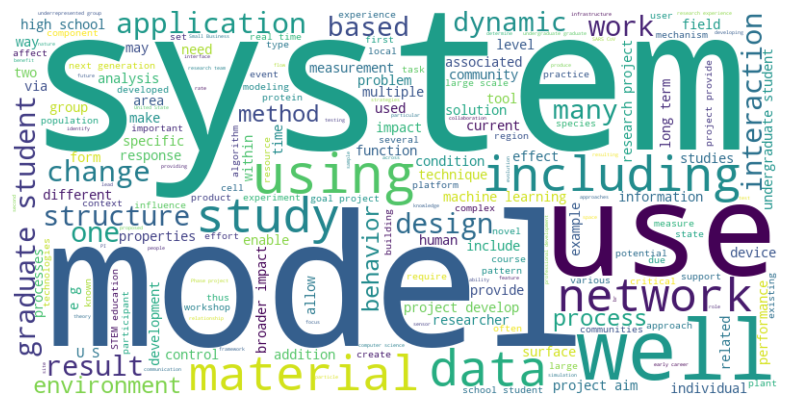

In [7]:
stop_words = set(stopwords.words('english'))
filtered_texts = []
for text in data:
    text_without_html = remove_html_tags(text)
    final_text = remove_last_paragraph(text_without_html)
    tokens = word_tokenize(final_text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_texts.append(' '.join(filtered_tokens))

filtered_text = ' '.join(filtered_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Hypothesis

Given the needs of the task, it is a topic modeling problem, so there are different approaches to address it. Some of the most popular topic modeling algorithms are Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and Probabilistic Latent Semantic Analysis (PLSA). In practice, the most used technique is LDA. Based on visual exploration
$$
H_{0}: \quad \text{The main topics of these papers are:}
$$
* Technology and Systems
* Modeling and Analysis
* Structure and Materials
* Life Science and Biology